In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('data/combined_clean.csv', low_memory=False)

In [6]:
data.drop(columns='Unnamed: 0', inplace=True)

In [218]:
data.head()

,ticker_symbol,co_name,unique_earnings_code,factset_sector_num,factset_ind_num,calendar_qtr,fiscal_qtr,adtv_prev_month,report_date,t-7,...,x0_3200.0_F.1,x0_3250.0_F.1,x0_3300.0_F.1,x0_3350.0_F.1,x0_3400.0_F.1,x0_3500.0_F.1,x0_4600.0_F.1,x0_4700.0_F.1,x0_4800.0_F.1,x0_4900.0_F.1
0,TCO,"Taubman Centers, Inc.",TCO.1Q14,4800.0,4890.0,1Q14,2014/1F,37.3,04/25/2014,2014-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SNX,SYNNEX Corporation,SNX.1Q14,3250.0,3265.0,1Q14,2014/1F,17.4,04/04/2014,2014-03-28,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIV,Apartment Investment and Management Company Cl...,AIV.1Q14,4800.0,4890.0,1Q14,2014/1F,62.7,05/02/2014,2014-04-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IT,"Gartner, Inc.",IT.1Q14,3200.0,3205.0,1Q14,2014/1F,51.1,05/01/2014,2014-04-24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MPWR,"Monolithic Power Systems, Inc.",MPWR.1Q14,1300.0,1305.0,1Q14,2014/1F,23.0,04/25/2014,2014-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
test_date = data.iloc[0][5]

In [222]:
test_date

'1Q14'

In [231]:
def _reformat_qtrs(x):
    qtr = x[:2]
    yr = x[2:]
    new_qtr = yr+'-'+qtr
    
    return new_qtr

In [233]:
_reformat_qtrs(test_date)

'14-1Q'

In [212]:
data.head()

,ticker_symbol,co_name,unique_earnings_code,factset_sector_num,factset_ind_num,calendar_qtr,fiscal_qtr,adtv_prev_month,report_date,t-7,...,x0_3200.0_F.1,x0_3250.0_F.1,x0_3300.0_F.1,x0_3350.0_F.1,x0_3400.0_F.1,x0_3500.0_F.1,x0_4600.0_F.1,x0_4700.0_F.1,x0_4800.0_F.1,x0_4900.0_F.1
0,TCO,"Taubman Centers, Inc.",TCO.1Q14,4800.0,4890.0,1Q14,2014/1F,37.3,04/25/2014,2014-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SNX,SYNNEX Corporation,SNX.1Q14,3250.0,3265.0,1Q14,2014/1F,17.4,04/04/2014,2014-03-28,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIV,Apartment Investment and Management Company Cl...,AIV.1Q14,4800.0,4890.0,1Q14,2014/1F,62.7,05/02/2014,2014-04-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IT,"Gartner, Inc.",IT.1Q14,3200.0,3205.0,1Q14,2014/1F,51.1,05/01/2014,2014-04-24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MPWR,"Monolithic Power Systems, Inc.",MPWR.1Q14,1300.0,1305.0,1Q14,2014/1F,23.0,04/25/2014,2014-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sns.set()

In [313]:
def plot_returns_hist(filename):    
    sns.set()
    df = pd.read_csv('data/'+filename+'.csv', low_memory=False)
    df.drop(columns='Unnamed: 0', inplace=True)
    returns = df['rel_t+3_rtn']
    fig, ax = plt.subplots(figsize= (8, 5))
    plt.tight_layout()
    ax = sns.distplot(returns, kde=False, bins=256)
    _ = ax.set_title("Earnings Event Return Distribution")
    _ = ax.set_xlabel("Relative Returns: t-1 to t+3")
    _ = ax.set_ylabel("Proportion of Data")
    _ = ax.set_xlim(left=-50, right=50)
    _ = plt.subplots_adjust(bottom=0.12)
    plt.savefig('viz/rtns_all.png')
    

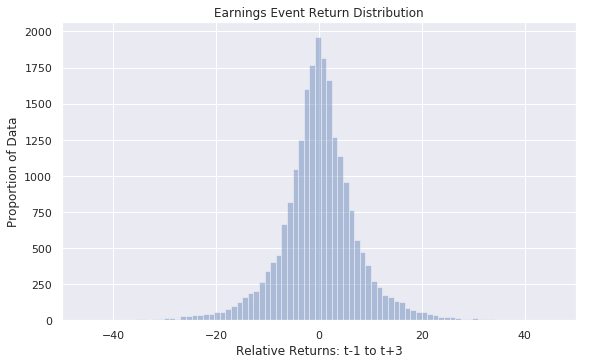

In [314]:
plot_returns_hist('combined_clean')

In [155]:
data[data['calendar_qtr']=='1Q18']

,ticker_symbol,co_name,unique_earnings_code,factset_sector_num,factset_ind_num,calendar_qtr,fiscal_qtr,adtv_prev_month,report_date,t-7,...,x0_3200.0_F.1,x0_3250.0_F.1,x0_3300.0_F.1,x0_3350.0_F.1,x0_3400.0_F.1,x0_3500.0_F.1,x0_4600.0_F.1,x0_4700.0_F.1,x0_4800.0_F.1,x0_4900.0_F.1


In [315]:
def obs_by_qtr_bars(filename):
    sns.set()
    df = pd.read_csv('data/'+filename+'.csv', low_memory=False)
    df.drop(columns='Unnamed: 0', inplace=True)   
    df['calendar_qtr'] = df['calendar_qtr'].apply(_reformat_qtrs)
    obs_by_qtr = df.groupby(['calendar_qtr'])['targets'].count()
    fig, ax = plt.subplots()
    x = np.arange(len(obs_by_qtr.values))
    bars = ax.bar(x, obs_by_qtr.values)
    _ = ax.set_xticks(x)
    _ = ax.set_xticklabels(obs_by_qtr.index, rotation=90)
    _ = ax.set_ylim(bottom=1100, top=1350)
    _ = ax.set_title("Observations by Calendar Quarter")
    _ = ax.set_xlabel("Calendar Quarters")
    _ = ax.set_ylabel("Number of Observations")
    _ = plt.subplots_adjust(bottom=0.2)
    plt.savefig('viz/obs_by_qtr.png')
    

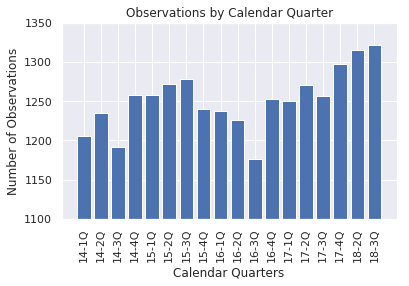

In [316]:
obs_by_qtr_bars('combined_clean')

In [302]:
def targets_df(filename):
    df = pd.read_csv('data/'+filename+'.csv', low_memory=False)
    df.drop(columns='Unnamed: 0', inplace=True)
    df['calendar_qtr'] = df['calendar_qtr'].apply(_reformat_qtrs)
    obs_by_qtr = df.groupby(['calendar_qtr'])['targets'].count()
    labels_by_qtr = df.groupby(['calendar_qtr', 'targets'])['ticker_symbol'].count()
    targets_count = pd.DataFrame(labels_by_qtr).reset_index('targets')
    targets_count = targets_count[targets_count['targets'] == 1]
    targets_count = targets_count.drop(['targets'], axis=1)
    targets_count['observations'] = obs_by_qtr.values
    targets_count.rename(columns={'ticker_symbol':'targets'}, inplace=True)
    targets_count['target_pct'] = (targets_count['targets'] / targets_count['observations'])*100
    
    targets_count.to_csv('data/targets_df.csv')
    return targets_count
    

In [294]:
test = targets_df('combined_clean')

In [295]:
test

,targets,observations,target_pct
calendar_qtr,,,
14-1Q,62,1205,5.145228
14-2Q,54,1235,4.372470
14-3Q,68,1191,5.709488
14-4Q,64,1258,5.087440
15-1Q,56,1258,4.451510
15-2Q,88,1272,6.918239
15-3Q,78,1278,6.103286
15-4Q,91,1240,7.338710
16-1Q,73,1237,5.901374


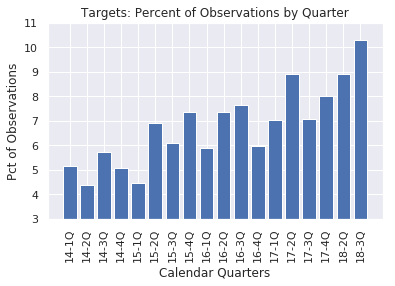

In [308]:
targets_pct_plot('targets_df')

In [307]:
def targets_pct_plot(filename):
    df = pd.read_csv('data/'+filename+'.csv', low_memory=False)    
    df.reset_index(inplace=True)
    
    sns.set()
    fig, ax = plt.subplots()
    x = np.arange(len(df['target_pct'].values))
    bars = ax.bar(x, df['target_pct'].values)
    _ = ax.set_xticks(x)
    _ = ax.set_xticklabels(df['calendar_qtr'], rotation=90)
    _ = ax.set_ylim(bottom=3, top=11)
    _ = ax.set_title("Targets: Percent of Observations by Quarter")
    _ = ax.set_xlabel("Calendar Quarters")
    _ = ax.set_ylabel("Pct of Observations")
    _ = plt.subplots_adjust(bottom=0.2)
    plt.savefig('viz/targets_pct_plot.png')

In [74]:
obs_by_qtr = data.groupby(['calendar_qtr'])['targets'].count()

In [134]:
obs_by_qtr

calendar_qtr
1Q14    1205
1Q15    1258
1Q16    1237
1Q17    1250
2Q14    1235
2Q15    1272
2Q16    1226
2Q17    1271
2Q18    1315
3Q14    1191
3Q15    1278
3Q16    1176
3Q17    1257
3Q18    1322
4Q14    1258
4Q15    1240
4Q16    1253
4Q17    1297
Name: targets, dtype: int64

In [135]:
labels_by_qtr = data.groupby(['calendar_qtr', 'targets'])['ticker_symbol'].count()

In [136]:
labels_by_qtr

calendar_qtr  targets
1Q14          0          1143
              1            62
1Q15          0          1202
              1            56
1Q16          0          1164
              1            73
1Q17          0          1162
              1            88
2Q14          0          1181
              1            54
2Q15          0          1184
              1            88
2Q16          0          1136
              1            90
2Q17          0          1158
              1           113
2Q18          0          1198
              1           117
3Q14          0          1123
              1            68
3Q15          0          1200
              1            78
3Q16          0          1086
              1            90
3Q17          0          1168
              1            89
3Q18          0          1186
              1           136
4Q14          0          1194
              1            64
4Q15          0          1149
              1            91
4Q16          0   

In [186]:
targets_count = pd.DataFrame(labels_by_qtr).reset_index('targets')

In [187]:
targets_count = targets_count[targets_count['targets'] == 1]

In [188]:
targets_count = targets_count.drop(['targets'], axis=1)

In [189]:
targets_count['observations'] = obs_by_qtr.values

In [190]:
targets_count.rename(columns={'ticker_symbol':'targets'}, inplace=True)

In [194]:
targets_count['target_pct'] = (targets_count['targets'] / targets_count['observations'])*100

In [195]:
targets_count

,targets,observations,target_pct
calendar_qtr,,,
1Q14,62,1205,5.145228
1Q15,56,1258,4.451510
1Q16,73,1237,5.901374
1Q17,88,1250,7.040000
2Q14,54,1235,4.372470
2Q15,88,1272,6.918239
2Q16,90,1226,7.340946
2Q17,113,1271,8.890637
2Q18,117,1315,8.897338
